In [2]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import ast

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df

#Clean data
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df.job_skills=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

**1. Investigating high paying skills and most demanded skills in US**

In [8]:
df_US=df[df['job_country']=="United States"]
df_US=df_US.dropna(subset='salary_year_avg')
df_US_explode=df_US.explode('job_skills')
df_US_explode[['job_skills','salary_year_avg']]
df_US_group=df_US_explode.groupby('job_skills')['salary_year_avg'].agg(['median','count'])
df_US_top_demanded=df_US_explode.groupby('job_skills')['salary_year_avg'].agg(['median','count']).sort_values(by='count',ascending=False).head(10)
df_US_top_pay=df_US_explode.groupby('job_skills')['salary_year_avg'].agg(['median','count']).sort_values(by='median',ascending=False).head(10)




**2. Visualization**

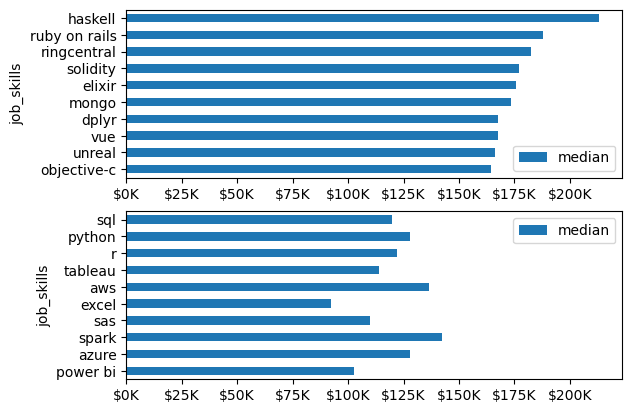

In [ ]:
fig, ax=plt.subplots(2,1)

df_US_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0])
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))


df_US_demanded[::-1].plot(kind='barh',y='median',ax=ax[1])
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
